In [ ]:
!pip install pandas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
df = pd.read_csv('/content/drive/MyDrive/MP1B/heart_2022_no_nans.csv')
df


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [ ]:
import numpy as np
import pandas as pd

# Now you can use df
#
x_train = np.array(df[['GeneralHealth', 'SleepHours']]) #x_train adalah variabel data input (features) yang menjadi parameter untuk memprediksi target
y_train = np.array(df['Sex']) #y_train adalah variabel output atau target yang akan dipelajari oleh model

#np.array digunakan untuk mengonversi subset DataFrame menjadi array NumPy

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[['Very good' 9.0]
 ['Very good' 6.0]
 ['Very good' 8.0]
 ...
 ['Good' 7.0]
 ['Excellent' 7.0]
 ['Very good' 5.0]]

y_train: ['Female' 'Male' 'Male' ... 'Male' 'Female' 'Male']


In [ ]:
y_train = y_train.flatten() #flatten() digunakan untuk memastikan bahwa y_train sesuai dengan format yang diharapkan
#flatten() digunakan untuk merapikan data dalam variabel
print(f'y_train: {y_train}') #menampilkan y_train

y_train: ['Female' 'Male' 'Male' ... 'Male' 'Female' 'Male']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder #library untuk melakukan tahap preprocessing
from sklearn.neighbors import KNeighborsClassifier #library untuk penggunaan model knn
from sklearn.model_selection import train_test_split #library untuk melakukan proses split data.
#Ada data yang di training (dilatih) dan data yang digunakan untuk testing (pengujian)

# Prepare features and target variable
X = df[['GeneralHealth', 'SleepHours']] #features
y = df['Sex'] #target

# Split data into training and testing sets
#proses pembagian antara data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#test_size=0.2 artinya 20% data digunakan untuk pengujian (testing) sedangkan 80% atau sisanya untuk pelatihan (training)
#kenapa lebih banyak training daripada testing, ibaratnya seperti kita di sekolah, lebih banyak belajarnya daripada ujian
#random_state=42 digunakan untuk pengacakan sehingga hasil pembagian dataset tetap konsisten setiap kali dijalankan

# Create an OrdinalEncoder for the 'GeneralHealth' column
#digunakan untuk mengubah data kategori menjadi angka berdasarkan urutan tertentu
health_encoder = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very good', 'Excellent']]) # Specify order if needed

# Fit and transform the 'GeneralHealth' column in the training data
X_train['GeneralHealth'] = health_encoder.fit_transform(X_train[['GeneralHealth']])

# Transform the 'GeneralHealth' column in the testing data (using the same encoder)
X_test['GeneralHealth'] = health_encoder.transform(X_test[['GeneralHealth']])

# One-hot encode the target variable
#penggunaan label binarizer 0 dan 1
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
#ditransformasikan ke y_train

# Create and train the KNeighborsClassifier
K = 3 #jumlah neighborclassifier
#semakin kecil K maka semakin akurat
clf = KNeighborsClassifier(n_neighbors=K) #penamaan variabel clf dan penggunaan metode knn
clf.fit(X_train, y_train)  # Now X_train has numerical values for 'GeneralHealth'

# Now you can use clf for prediction

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
SleepHours = 2 #memasukkan features SleepHours
GeneralHealth = 'Good' # Changed: Enclose 'Excellent' in quotes to make it a string

x_new = np.array([[SleepHours, GeneralHealth]]).reshape(1, -1) #mengolah inputan
x_new

array([['2', 'Good']], dtype='<U21')

In [ ]:
from sklearn.preprocessing import OneHotEncoder #library untuk mengubah data menjadi representasi numerik berupa vektor biner

oh = OneHotEncoder()
x_new_encoded = oh.fit_transform(x_new).toarray()
x_new_encoded

array([[1., 1.]])

In [ ]:
#proses prediksi dari inputan features
y_new = clf.predict(x_new_encoded) #Replace 'model' with 'clf'
print(y_new)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
lb.inverse_transform(y_new) #mentransformasikan data biner menjadi string

array(['Male'], dtype='<U6')

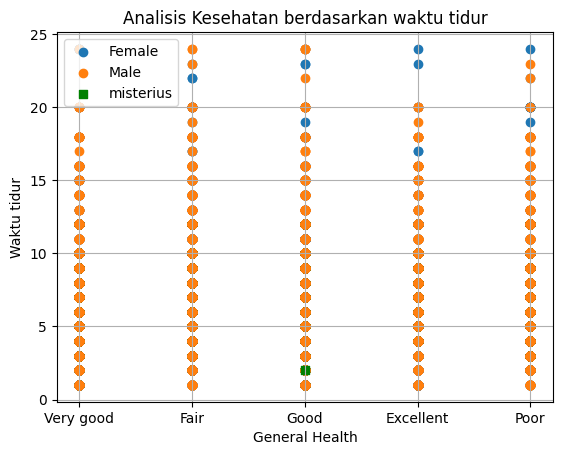

In [ ]:
import matplotlib.pyplot as plt #library untuk visualisasi data

fig, ax = plt.subplots() #fig untuk membuat figure, ax merepresentasikan area plotting
for Gender, group in df.groupby('Sex'): #grouping data berdasarkan gender
    ax.scatter(group['GeneralHealth'], group['SleepHours'], label=Gender) #grouping mengambil data dari 'GeneralHealth' dan 'SleepHours'

plt.scatter(GeneralHealth,
            SleepHours,
            marker='s',
            color='Green',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Analisis Kesehatan berdasarkan waktu tidur') #judul grafik
plt.xlabel('General Health') #label untuk sumbu x
plt.ylabel('Waktu tidur') #label untuk sumbu y
plt.grid(True) #menambahkan grid pada grafik untuk mempermudah membaca data
plt.show() #menampilan grafik

In [ ]:
misterius = np.array([GeneralHealth, SleepHours])
misterius

array(['Good', '2'], dtype='<U21')

In [ ]:
x_train

array([['Very good', 9.0],
       ['Very good', 6.0],
       ['Very good', 8.0],
       ...,
       ['Good', 7.0],
       ['Excellent', 7.0],
       ['Very good', 5.0]], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Pastikan 'misterius' berisi nilai numerik dan gunakan X_train:
misterius = np.array([health_encoder.transform([[GeneralHealth]])[0][0], SleepHours])

# Ubah tipe data kolom dalam X_train menjadi numerik jika perlu:
X_train['GeneralHealth'] = pd.to_numeric(X_train['GeneralHealth'])
X_train['SleepHours'] = pd.to_numeric(X_train['SleepHours'])

# Hitung jarak Euclidean:
data_jarak = [euclidean(misterius, group) for group in X_train.values]
data_jarak

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


[4.0,
 5.385164807134504,
 7.280109889280518,
 4.0,
 5.0990195135927845,
 4.47213595499958,
 1.0,
 4.0,
 1.4142135623730951,
 3.605551275463989,
 4.123105625617661,
 5.0990195135927845,
 5.0,
 4.0,
 6.0,
 6.0,
 4.123105625617661,
 5.0,
 4.0,
 5.0990195135927845,
 6.324555320336759,
 4.0,
 4.47213595499958,
 5.0990195135927845,
 5.0990195135927845,
 6.0,
 5.0,
 4.123105625617661,
 5.385164807134504,
 4.123105625617661,
 6.082762530298219,
 6.082762530298219,
 7.0,
 5.0,
 4.0,
 5.0990195135927845,
 6.082762530298219,
 5.0990195135927845,
 1.4142135623730951,
 5.0,
 5.0,
 5.0990195135927845,
 5.0,
 5.0990195135927845,
 5.0,
 4.123105625617661,
 4.0,
 4.123105625617661,
 6.324555320336759,
 5.0,
 6.324555320336759,
 5.0990195135927845,
 5.0,
 13.0,
 3.0,
 4.47213595499958,
 4.47213595499958,
 5.0990195135927845,
 5.0990195135927845,
 4.123105625617661,
 5.0,
 5.385164807134504,
 4.0,
 14.142135623730951,
 5.0,
 6.0,
 4.123105625617661,
 3.605551275463989,
 4.123105625617661,
 5.0,
 4.12310

In [ ]:
# Mengambil subset dari df yang sesuai dengan panjang data_jarak
subset_df = df.iloc[:len(data_jarak)].copy()

# Menambahkan kolom 'jarak'
subset_df['jarak'] = data_jarak

# Jika ingin menyimpan kembali ke df utama
df.update(subset_df)

In [ ]:
subset_df['jarak'] = data_jarak
subset_df.sort_values(['jarak'])

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,jarak
76212,Kentucky,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,1 to 5,No,...,122.47,36.62,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0.000000
55589,Illinois,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,88.00,34.37,Yes,Yes,No,No,"Yes, received Tdap",No,Yes,0.000000
61612,Indiana,Male,Good,7.0,30.0,Within past year (anytime less than 12 months ...,No,4.0,None of them,No,...,104.33,30.34,No,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,No,0.000000
57458,Indiana,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,No,...,74.84,25.84,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,0.000000
143559,New York,Male,Good,4.0,1.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,88.45,28.80,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171603,Oregon,Female,Fair,0.0,5.0,Within past 2 years (1 year but less than 2 ye...,No,7.0,1 to 5,No,...,74.84,28.32,No,Yes,No,Yes,"Yes, received tetanus shot but not sure what type",No,No,22.022716
63585,Iowa,Male,Fair,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,110.68,33.09,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,22.022716
164846,Ohio,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,None of them,No,...,113.40,36.92,No,No,Yes,Yes,"Yes, received Tdap",No,No,22.022716
160610,Ohio,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,"6 or more, but not all",No,...,86.18,25.77,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,22.090722


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder #library untuk melakukan tahap preprocessing
from sklearn.neighbors import KNeighborsClassifier #library untuk penggunaan model knn
from sklearn.model_selection import train_test_split #library untuk melakukan proses split data.
#Ada data yang di training (dilatih) dan data yang digunakan untuk testing (pengujian)

# Prepare features and target variable
X = df[['GeneralHealth', 'SleepHours']] #features
y = df['Sex'] #target

# Split data into training and testing sets
#proses pembagian antara data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#test_size=0.2 artinya 20% data digunakan untuk pengujian (testing) sedangkan 80% atau sisanya untuk pelatihan (training)
#kenapa lebih banyak training daripada testing, ibaratnya seperti kita di sekolah, lebih banyak belajarnya daripada ujian
#random_state=42 digunakan untuk pengacakan sehingga hasil pembagian dataset tetap konsisten setiap kali dijalankan

# Create an OrdinalEncoder for the 'GeneralHealth' column
#digunakan untuk mengubah data kategori menjadi angka berdasarkan urutan tertentu
health_encoder = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very good', 'Excellent']]) # Specify order if needed

# Fit and transform the 'GeneralHealth' column in the training data
X_train['GeneralHealth'] = health_encoder.fit_transform(X_train[['GeneralHealth']])

# Transform the 'GeneralHealth' column in the testing data (using the same encoder)
X_test['GeneralHealth'] = health_encoder.transform(X_test[['GeneralHealth']])

# One-hot encode the target variable
#penggunaan label binarizer 0 dan 1
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
#ditransformasikan ke y_train
X_test = np.array([['Good', 8.0], ['Very good', 5.0], ['Excellent', 6.0], ['Good', 3.0]])
y_test = lb.transform(np.array(['Male', 'Female', 'Female', 'Male'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[['Good' '8.0']
 ['Very good' '5.0']
 ['Excellent' '6.0']
 ['Good' '3.0']]

y_test:
[1 0 0 1]


In [ ]:
y_pred = model.predict(X_test)

print(y_pred)

[1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.5


In [ ]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precision: {prec}')

Precision: 0.5


In [ ]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.6666666666666666


In [ ]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.0
